<a href="https://colab.research.google.com/github/MshSteven/MA3832/blob/main/Week1_ReviewML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#1 Load data
url= "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
data = pd.read_csv(url, sep=",")

In [ ]:
#2)Comment on the explanatory variables of the data.
data_desc = data.describe() #does a statistical by column
data_desc
#print(data_desc)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9ae73de50>,
      dtype=object)

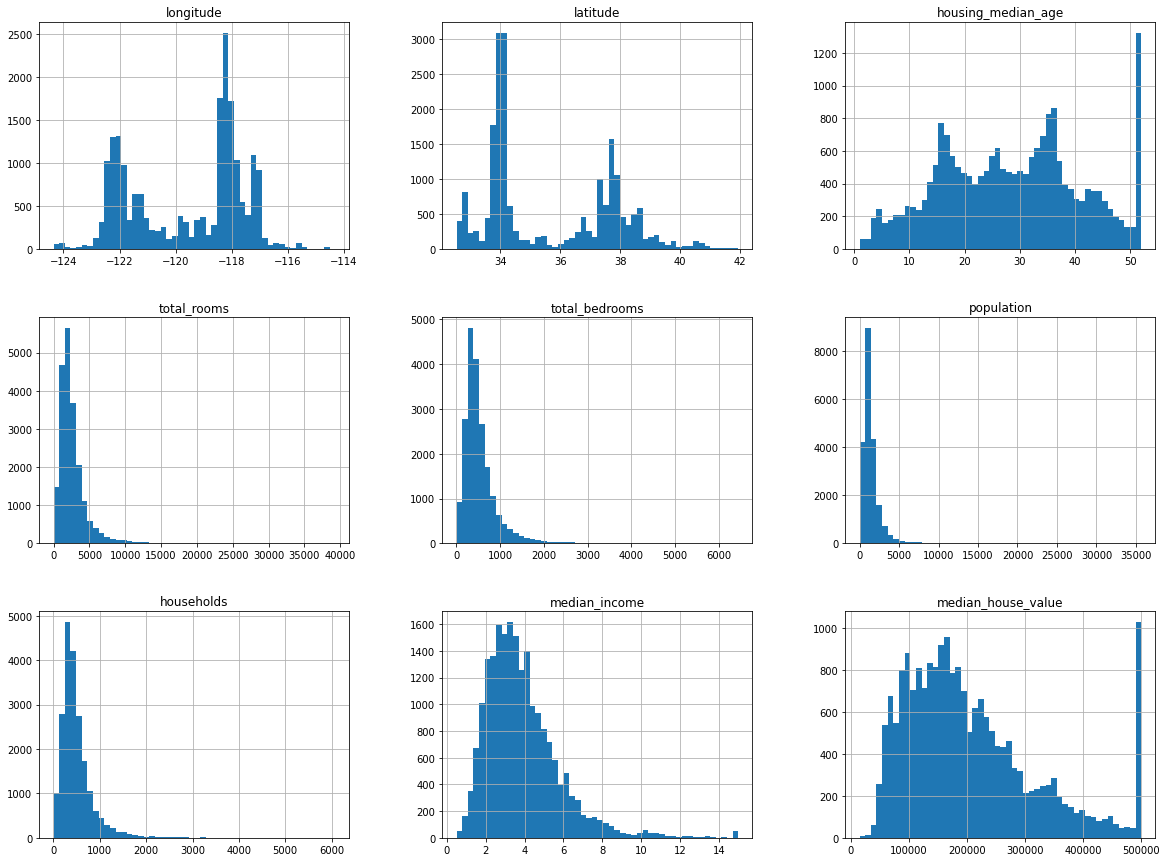

In [ ]:
#3. Plot histogram of the variables
data.hist(bins = 50, figsize=(20,15))

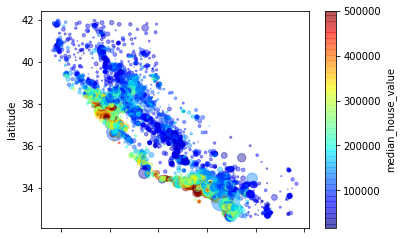

In [ ]:
# 4. Plot scatter plot reecting location of houses versus population and the sales prices.
# Any comments?
data.plot(kind="scatter", x="longitude", alpha=0.4, y= "latitude", s=data["population"]/100, c ="median_house_value",
          cmap=plt.get_cmap("jet"), colorbar=True)

In [ ]:
#5. Calculate the correlation coecients of the variables to median house value. Comment on this
corr_matrix = data.corr()
print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

In [ ]:
corr_matrix['median_house_value']

#median house value is 70% correlated with median_income

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [ ]:
# 6. Propose an approach to deal with missing values for total bedrooms
median_bedrooms= data["total_bedrooms"].median()
print(median_bedrooms)

data["total_bedrooms"].fillna(median_bedrooms, inplace=True)
data.info()

#another way is to use Imputer from scikit-learn library

435.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# 7. Creating new variables
data["rooms_per_household"] = data["total_rooms"]/data["households"]
data["bedrooms_per_household"] = data["total_bedrooms"]/data["households"]
data["population_per_household"] = data["population"]/data["households"]

In [ ]:
#8 Create a new binary variable Y such that Y = 1 if median house value> 179,700 and 0 otherwise.
# the second argument is the column name Y
data.loc[data['median_house_value']>179700, "Y"] =1
data.loc[data['median_house_value']<=179700, "Y"] =0

data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_household    20640 non-null  float64
 12  population_per_household  20640 non-null  float64
 13  Y                         20640 non-null  float64
dtypes: flo

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,population_per_household,Y
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556,1.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842,1.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260,1.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945,1.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467,1.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,4.761658,1.103627,2.139896,1.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,4.931907,0.951362,2.128405,1.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,4.797527,1.061824,1.788253,1.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,4.294118,1.117647,2.026891,1.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,4.970588,0.990196,2.172269,1.0


# Linear Regression

Only consider the following explanatory variables for OLS analysis:
room per household, bedrooms per household,population per household,medianIncome,
housingMedianAge.

In [ ]:
# get certain columns
housing_ols = data.iloc[:,[2,7,10,11,12,8]]

housing_ols_des = housing_ols.describe()
housing_ols_des

,housing_median_age,median_income,rooms_per_household,bedrooms_per_household,population_per_household,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,3.870671,5.429000,1.100910,3.070655,206855.816909
std,12.585558,1.899822,2.474173,0.519159,10.386050,115395.615874
min,1.000000,0.499900,0.846154,0.121204,0.692308,14999.000000
25%,18.000000,2.563400,4.440716,1.005525,2.429741,119600.000000
50%,29.000000,3.534800,5.229129,1.048860,2.818116,179700.000000
75%,37.000000,4.743250,6.052381,1.100015,3.282261,264725.000000
max,52.000000,15.000100,141.909091,34.066667,1243.333333,500001.000000


In [ ]:
# filter out the data as required
housing_ols = housing_ols[(housing_ols['rooms_per_household']<10) &
                          (housing_ols['population_per_household']<10)&
                          (housing_ols['bedrooms_per_household']<5)]
housing_ols_des = housing_ols.describe()
housing_ols_des

,housing_median_age,median_income,rooms_per_household,bedrooms_per_household,population_per_household,median_house_value
count,20374.000000,20374.000000,20374.000000,20374.000000,20374.000000,20374.000000
mean,28.752184,3.867201,5.275247,1.068436,2.922885,207129.804898
std,12.558358,1.888422,1.225322,0.158834,0.766405,115328.997859
min,1.000000,0.499900,0.846154,0.121204,0.750000,14999.000000
25%,18.000000,2.562500,4.432560,1.004929,2.433119,119800.000000
50%,29.000000,3.534100,5.213934,1.047880,2.822827,180400.000000
75%,37.000000,4.743550,6.015022,1.097710,3.283472,265300.000000
max,52.000000,15.000100,9.979167,4.887640,9.954545,500001.000000


In [ ]:
from sklearn.model_selection import train_test_split
import random
from sklearn.linear_model import LinearRegression
import numpy as np
random.seed(10)

In [ ]:
#split the training set to be 70% and test set to be 30%
train_set, test_set = train_test_split(housing_ols, test_size=0.3, random_state=12)
train_set.shape,test_set.shape


((14261, 6), (6113, 6))

In [ ]:
log_Ytrain = np.log(train_set["median_house_value"])

#: means all rows, take col 5 only
log_Ytrain = np.log(train_set.iloc[:,5])
Ytest = test_set["median_house_value"]

#all rows and first 5 columns
Xtrain = train_set.iloc[:,0:5]
Xtest = test_set.iloc[:,0:5]

In [ ]:
Xtrain


,housing_median_age,median_income,rooms_per_household,bedrooms_per_household,population_per_household
844,16.0,6.5116,6.157303,0.940075,3.868914
419,52.0,6.3810,6.662338,1.069264,2.175325
19150,14.0,3.7813,5.826196,1.095718,2.403023
3590,11.0,3.8583,5.186654,1.121857,2.691489
12111,28.0,2.2750,4.218553,1.113208,3.218553
...,...,...,...,...,...
3770,41.0,3.4208,4.183673,0.975510,1.734694
7473,36.0,2.1715,3.996383,1.146474,4.233273
19963,22.0,2.5875,5.537736,0.986792,3.635849
5847,5.0,3.3205,3.908897,1.102491,2.133096


In [ ]:
Xtest

,housing_median_age,median_income,rooms_per_household,bedrooms_per_household,population_per_household
9029,28.0,6.8300,6.748744,1.080402,2.447236
13811,26.0,2.7198,5.866817,1.124153,3.006772
20012,26.0,1.9439,5.768977,1.141914,2.940594
3666,38.0,1.3594,4.310345,1.448276,2.172414
12452,20.0,1.9250,5.549618,1.244275,2.381679
...,...,...,...,...,...
5397,45.0,5.0866,5.710407,1.009050,2.882353
20493,23.0,6.0783,5.633987,0.866013,3.052288
15339,16.0,2.0147,4.598997,1.077694,1.501253
2523,33.0,3.6429,6.253731,1.149254,2.835821


In [ ]:
# Fit LS to training data

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(Xtrain, log_Ytrain) #(X,Y)
print('intercept', lin_reg.intercept_)
print('coefficeints', lin_reg.coef_)

intercept 11.82615634949681
coefficeints [ 0.0054877   0.26192834 -0.13208086  0.19806505 -0.14591691]


In [ ]:
 # R2
r_sq = lin_reg.score(Xtrain, log_Ytrain)
print(r_sq)

# Prediction
log_Ypred = lin_reg.predict(Xtest)
Ypred = np.exp(log_Ypred)


0.5425597959160843


In [ ]:

from sklearn.metrics import mean_squared_error
lin_reg_mse = mean_squared_error(Ypred, Ytest)
lin_reg_rmse = np.sqrt(lin_reg_mse)
lin_reg_rmse

0.3242462936021454

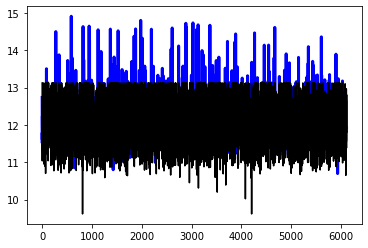

In [ ]:
# Plotting
import matplotlib.pyplot as plt
T=list(range(0,len(Ypred)))
T=np.array(T)
T
log_Ytest = np.log(Ytest)

plt.figure()
plt.plot(T, log_Ypred, color='blue', linewidth=3)
plt.plot(T, log_Ytest, color='black')
plt.show()

In [ ]:
#****************************************************
# One hot encoder
#**************************************************
from sklearn.preprocessing import OneHotEncoder
ocean = data[["ocean_proximity"]]
ocean_tranform = OneHotEncoder()
ocean_new = ocean_tranform.fit_transform(ocean) # should be in data frame
ocean_new

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [ ]:
#convert to a Numpy dense array
ocean_new.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
ocean_tranform.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Random tree forest

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
housing_rtf = data.iloc[:,[0,1,2,7,9,10,11,12]]
# transforming data using Pipeline
num_features = ["longitude","latitude","housing_median_age","median_income","rooms_per_household", "bedrooms_per_household","population_per_household"]
num_transformer = Pipeline([('imputer', SimpleImputer(strategy="median")),('scaler', StandardScaler())])
cat_features = ["ocean_proximity"]
cat_transformer = OneHotEncoder()
preprocessor = ColumnTransformer([("num", num_transformer, num_features),("cat", cat_transformer, cat_features)])
housing_rtf = preprocessor.fit_transform(housing_rtf)




In [ ]:
housing_rtf

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.        ,
         1.        ,  0.        ],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.        ,
         1.        ,  0.        ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87362627,  1.77823747, -0.84539315, ...,  0.        ,
         0.        ,  0.        ],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.        ,
         0.        ,  0.        ]])

https://www.w3schools.com/python/numpy/numpy_array_reshape.asp

Unknown Dimension
You are allowed to have one "unknown" dimension.

Meaning that you do not have to specify an exact number for one of the dimensions in the reshape method.

Pass -1 as the value, and NumPy will calculate this number for you

In [ ]:
#takes Y column and changes to numpy array
Y = data.iloc[:,13].to_numpy()
Y= Y.reshape((-1,1))
Y

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
#combine column wise
housing_rtf_final = pd.DataFrame(np.concatenate((housing_rtf,Y),axis=1))
random.seed(10)
train_set, test_set = train_test_split(housing_rtf_final, test_size=0.3, random_state=12)
Ytrain = train_set.iloc[:,12]
Ytest =test_set.iloc[:,12]
Xtrain = train_set.iloc[:,0:12]
Xtest = test_set.iloc[:,0:12]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
rf=RandomForestClassifier()
rf.fit(Xtrain,Ytrain)

Ypred=rf.predict(Xtest)

In [ ]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Ytest, Ypred))


Accuracy: 0.8948643410852714


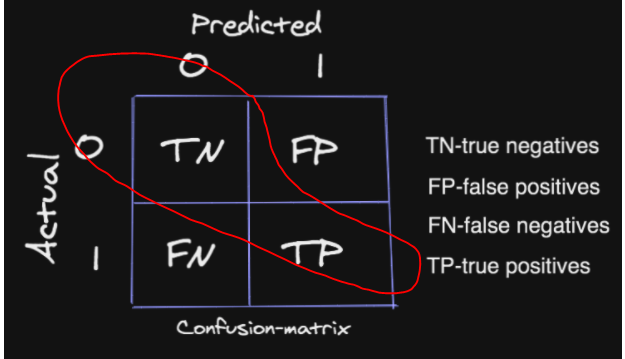

In [ ]:
confusion_matrix = metrics.confusion_matrix(Ytest, Ypred)
confusion_matrix

array([[2756,  332],
       [ 319, 2785]])

The diagonal elements represent the total correct values predicted per class

The lighter the color, the greater the number as we can see from the color-bar on the sid

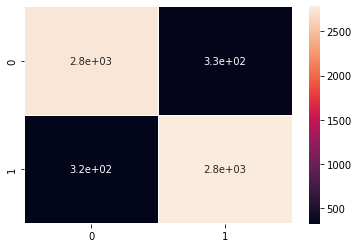

In [ ]:
#Create a Confusion Matrix heatmap from the above data
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True, linewidths = 0.01)